# Find out the best national team of all time by comparing victory rate of a team in home/away

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 

In [2]:
data = pd.read_csv('results.csv')

In [3]:
data.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41635,2020-09-08,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False
41636,2020-09-08,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False
41637,2020-09-08,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False
41638,2020-09-08,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False
41639,2020-09-08,San Marino,Liechtenstein,0,2,UEFA Nations League,Rimini,Italy,True


In [4]:
def result(row):
      
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['home_score'] < row['away_score']:
        return row['away_team']
    else:
        return('Tie')
    

In [5]:
data['results'] = data[['home_score','away_score','home_team','away_team']].apply(result,axis=1)
data.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England


In [6]:
def home_wins(row):
        
        if row['home_team'] == row['results']:
            return("Home")
        elif row['home_team'] != row['results'] and row['results'] == 'Tie':
            return("Tie")
        else:
            return("Away")

In [7]:
data['home_win'] = pd.DataFrame(data[['home_team','results']].apply(home_wins,axis=1))
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,home_win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Home
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,Home
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,Home


In [8]:
def make_stats_df(df):
    my_columns =  ['Home wins', 'Away wins', 'Total home games', 
                   'Total away games', 'Home win rate', 'Away win rate']
    data_df = pd.DataFrame(0, index = df['home_team'].append(df['away_team']).unique(), columns = my_columns)
    for i in range(len(df)):
        data_df.loc[df.iloc[i]['home_team']]['Total home games'] += 1
        data_df.loc[df.iloc[i]['away_team']]['Total away games'] += 1
        if df.iloc[i]['home_win'] == 'Home':
            data_df.loc[df.iloc[i]['home_team']]['Home wins'] += 1
        
        elif df.iloc[i]['home_win'] == 'Away':
            data_df.loc[df.iloc[i]['away_team']]['Away wins'] += 1
    data_df['Home win rate'] = data_df['Home wins']/data_df['Total home games']
    data_df['Away win rate'] = data_df['Away wins']/data_df['Total away games']
            
    return data_df

In [9]:
data_df = make_stats_df(data)

In [10]:
data_df.head()

,Home wins,Away wins,Total home games,Total away games,Home win rate,Away win rate
Scotland,215,157,381,402,0.564304,0.390547
England,308,265,498,513,0.618474,0.516569
Wales,124,86,322,336,0.385093,0.255952
Northern Ireland,106,59,313,333,0.338658,0.177177
United States,220,74,418,266,0.526316,0.278195


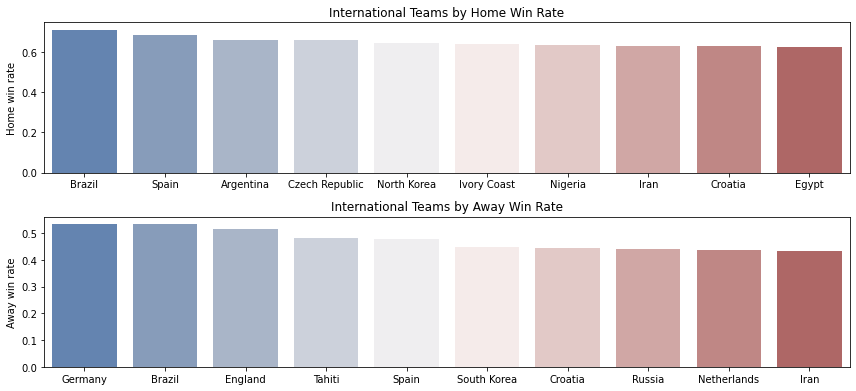

In [11]:
plt.figure(figsize = (12,8))
plt.subplot(311)
plt.title('International Teams by Home Win Rate')
sns.barplot(x = data_df[data_df['Total home games'] >= 100].sort_values('Home win rate', ascending = False).head(10).index, y = data_df[data_df['Total home games'] >= 50].sort_values('Home win rate', ascending = False).head(10)['Home win rate'], palette="vlag")
plt.subplot(312)
plt.title('International Teams by Away Win Rate')
sns.barplot(x = data_df[data_df['Total away games'] >= 100].sort_values('Away win rate', ascending = False).head(10).index, y = data_df[data_df['Total away games'] >= 50].sort_values('Away win rate', ascending = False).head(10)['Away win rate'], palette="vlag")

plt.tight_layout()

## Analyze which European country performs the best at soccer?

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [2]:
df.corr()

,home_score,away_score,neutral
home_score,1.000000,-0.136000,-0.032099
away_score,-0.136000,1.000000,0.084906
neutral,-0.032099,0.084906,1.000000


In [3]:
def winner(row):
    if row['home_score'] > row['away_score']: return row['home_team'] 
    elif row['home_score'] < row['away_score']: return row['away_team']
    else: return 'DRAW'
    
df['winner'] = df.apply(lambda row: winner(row), axis=1)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,DRAW
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,DRAW
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


In [4]:
def loser(row):
    if row['home_score'] < row['away_score']: return row['home_team'] 
    elif row['home_score'] > row['away_score']: return row['away_team']
    else: return 'DRAW'
    
df['loser'] = df.apply(lambda row: loser(row), axis=1)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,DRAW,DRAW
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,DRAW,DRAW
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England


In [5]:
winners = pd.value_counts(df.winner)
winners = winners.drop('DRAW')
winners.head(20)

Brazil         625
England        573
Germany        555
Argentina      526
Sweden         500
South Korea    454
Mexico         439
Hungary        435
Italy          424
France         419
Spain          407
Netherlands    399
Uruguay        382
Scotland       372
Russia         358
Denmark        356
Poland         352
Belgium        335
Zambia         328
Austria        324
Name: winner, dtype: int64

In [6]:
goals = pd.Series(index=winners.index, dtype='int32')
for col in goals.index:
    goals[col] = df[df.home_team == col].home_score.sum() + df[df.away_team == col].away_score.sum()
goals = goals.fillna(0).sort_values(ascending=False)
goals.head(20)

England        2209
Brazil         2149
Germany        2126
Sweden         2015
Hungary        1889
Argentina      1830
Netherlands    1619
Mexico         1514
South Korea    1512
France         1498
Denmark        1416
Spain          1405
Uruguay        1391
Austria        1386
Poland         1373
Italy          1371
Belgium        1363
Scotland       1355
Norway         1215
Russia         1205
dtype: int32

In [7]:
stats = pd.DataFrame(columns=winners.index, index=['wins', 'draws', 'loses'], dtype='float64')
for col in goals.index:
    stats[col]['wins'] = len(df[df.winner == col])
    stats[col]['draws'] = len(df[df.home_team == col]) + len(df[df.away_team == col]) - (len(df[df.winner == col]) + len(df[df.loser == col]))
    stats[col]['loses'] = len(df[df.loser == col])
stats.head()

,Brazil,England,Germany,Argentina,Sweden,South Korea,Mexico,Hungary,Italy,France,...,Saarland,Surrey,Kabylia,Romani people,Asturias,Micronesia,Republic of St. Pauli,Raetia,Central Spain,San Marino
wins,625.0,573.0,555.0,526.0,500.0,454.0,439.0,435.0,424.0,419.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
draws,199.0,243.0,196.0,243.0,225.0,222.0,200.0,202.0,225.0,178.0,...,2.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0
loses,157.0,195.0,200.0,211.0,295.0,186.0,230.0,293.0,153.0,245.0,...,6.0,0.0,3.0,2.0,0.0,6.0,2.0,6.0,1.0,160.0


In [8]:
df['tournament'].value_counts()

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
OSN Cup                                     4
World Unity Cup                             4
Copa América qualification                  2
Atlantic Heritage Cup                       2
AFF Championship qualification              2
Name: tournament, Length: 112, dtype: int64

Text(0.5, 0.98, 'Most games per tournament')

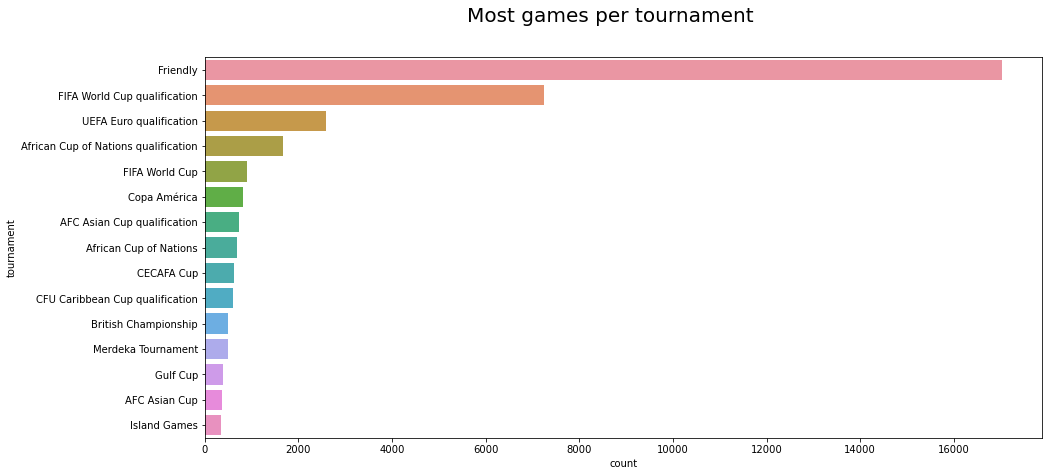

In [9]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(y = df["tournament"],order=df["tournament"].value_counts().index[:15])
fig.suptitle("Most games per tournament", fontsize=20)

In [10]:
df['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [11]:
veri=df[df['tournament']=='FIFA World Cup']
veri.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,Belgium
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France,Mexico
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia,Brazil
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Romania,Peru
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina,France


In [12]:
winners = pd.value_counts(veri.winner)
winners = winners.drop('DRAW')
winners.head(20)

Brazil            73
Germany           67
Italy             45
Argentina         43
France            34
Spain             30
England           29
Netherlands       27
Uruguay           24
Belgium           20
Sweden            19
Russia            19
Mexico            16
Poland            16
Hungary           15
Portugal          14
Yugoslavia        14
Switzerland       12
Austria           12
Czechoslovakia    11
Name: winner, dtype: int64

In [13]:
euro_teams=df[df['tournament'].isin(['FIFA World Cup', 'UEFA Euro', 'FIFA World Cup qualification', 'UEFA Euro qualification', 'UEFA Nations League'])]
euro_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,Belgium
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France,Mexico
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,Yugoslavia,Brazil
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,Romania,Peru
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina,France


In [14]:
winners = pd.value_counts(euro_teams.winner)
winners = winners.drop('DRAW')
winners.head(20)

Germany        243
Spain          222
Italy          211
Netherlands    207
England        191
France         189
Russia         189
Portugal       180
Belgium        168
Sweden         167
Romania        143
Brazil         138
Hungary        134
Denmark        133
Poland         130
Scotland       129
Austria        125
Switzerland    124
Greece         121
Mexico         119
Name: winner, dtype: int64

In [15]:
all_teams = df['loser'].unique()
enemys_df = pd.DataFrame('', index = all_teams[1:], columns = ['Worst Record Against'])
for country in all_teams[1:]: 
    enemys_df.loc[country]['Worst Record Against'] = df[df['loser'] == country]['winner'].value_counts().index[0]
enemys_df['Worst Record Against']

Scotland                         England
England                         Scotland
Wales                            England
Northern Ireland                 England
United States                     Mexico
                             ...        
Myanmar                        Indonesia
Yorkshire             Parishes of Jersey
Parishes of Jersey             Yorkshire
Chameria                        Abkhazia
Saint Helena                    Guernsey
Name: Worst Record Against, Length: 310, dtype: object

In [1]:
enemys_df.loc[winners.index].head(15)

NameError: name 'enemys_df' is not defined

## Explore tournament trend of goals and predict

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

data=pd.read_csv('results.csv')

### Explore the dataset

In [2]:
data.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41411,2019-11-14,Ecuador,Trinidad and Tobago,3,0,Friendly,Portoviejo,Ecuador,False
4037,1956-10-20,Wales,Scotland,2,2,British Championship,Cardiff,Wales,False
17702,1993-05-22,Jordan,Yemen,1,1,FIFA World Cup qualification,Irbid,Jordan,False
31335,2009-06-15,Brazil,Egypt,4,3,Confederations Cup,Bloemfontein,South Africa,True
41465,2019-11-16,Saint Martin,Barbados,1,0,CONCACAF Nations League,The Valley,Anguilla,True


In [3]:
data[['tournament']].describe()

,tournament
count,41640
unique,112
top,Friendly
freq,17029


In [4]:
data.groupby('tournament').agg('max')

,date,home_team,away_team,home_score,away_score,city,country,neutral
tournament,,,,,,,,
ABCS Tournament,2015-02-01,Suriname,Suriname,8,9,Willemstad,Suriname,True
AFC Asian Cup,2019-02-01,Yemen,Yemen DPR,8,7,Tripoli,Vietnam,True
AFC Asian Cup qualification,2018-03-27,Yemen,Yemen DPR,20,8,al-Wakrah,Yemen,True
AFC Challenge Cup,2016-11-15,Turkmenistan,Turkmenistan,11,6,New Delhi,Sri Lanka,True
AFC Challenge Cup qualification,2013-03-26,Turkmenistan,Turkmenistan,9,9,Vientiane,Sri Lanka,True
...,...,...,...,...,...,...,...,...
Viva World Cup,2012-06-09,Zanzibar,Zanzibar,21,18,Xewkija,Sweden,True
WAFF Championship,2014-01-07,Yemen,Yemen,7,4,al-Farwaniyah,Syria,True
West African Cup,1987-02-08,Togo,Togo,5,5,Ouagadougou,Liberia,True


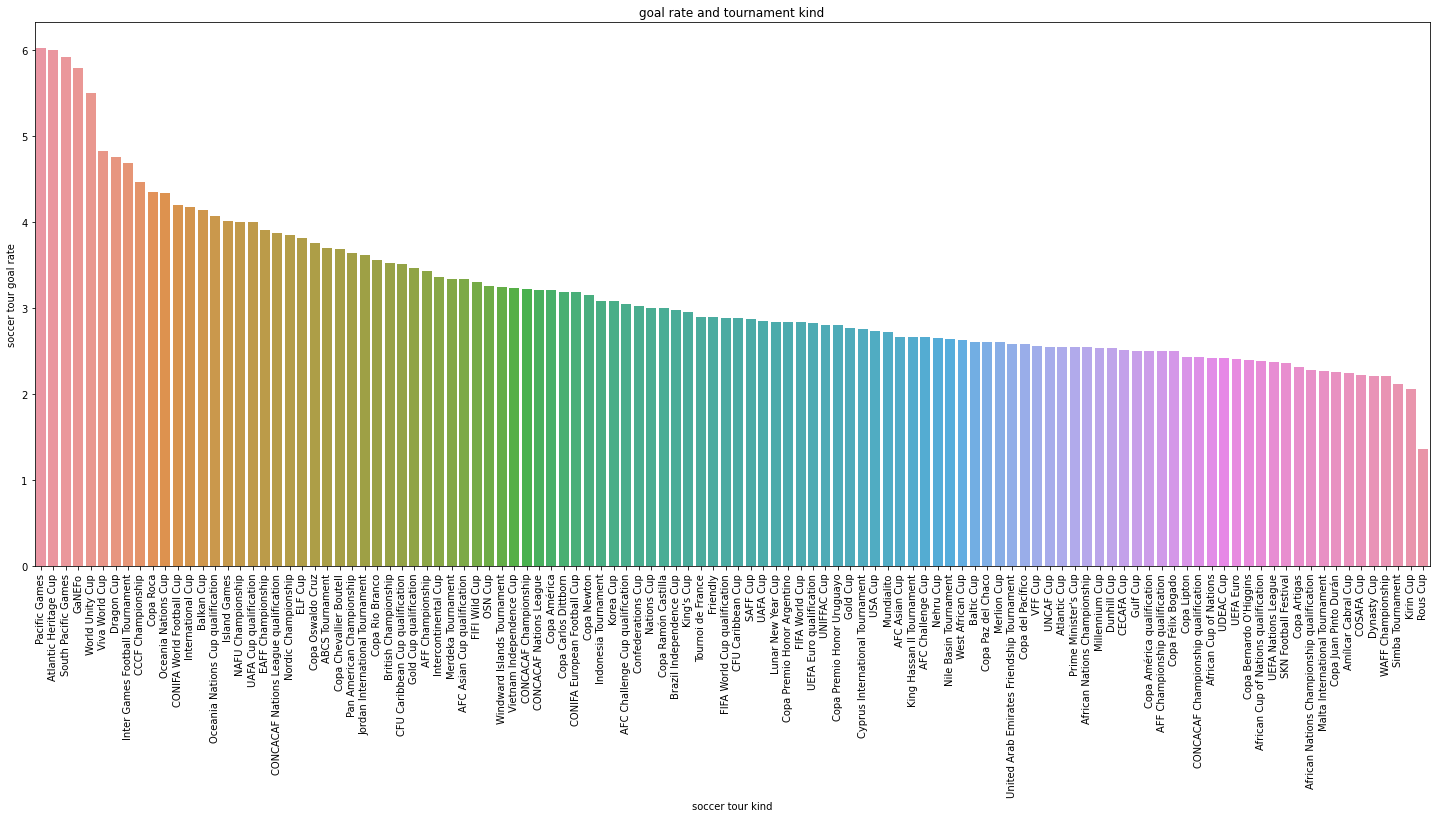

In [5]:
import seaborn as sns 
tour_kind = list(data.tournament.unique())

tour_goal_rate = []
for i in tour_kind:
    t = data[data["tournament"] == i]
    rate = (sum(t.home_score)+sum(t.away_score))/len(t)
    tour_goal_rate.append(rate)

dictionary = {"tour_goal_rate" : tour_goal_rate, "tour_kind" : tour_kind}
new_data = pd.DataFrame(dictionary)
new_index  = (new_data["tour_goal_rate"].sort_values(ascending = False)).index.values
sorted_data = new_data.reindex(new_index)

plt.figure(figsize = (25,10))
sns.barplot(x = sorted_data["tour_kind"],y = sorted_data["tour_goal_rate"])
plt.xticks(rotation = 90)
plt.xlabel("soccer tour kind")
plt.ylabel("soccer tour goal rate")
plt.title("goal rate and tournament kind")
plt.show()

### Add total_scores and Year Column

In [6]:
data['total_scores'] = data['home_score'] + data['away_score']
# covert str to date time format
data['date'] = pd.to_datetime(data['date'])
data['year'] = data.date.dt.year

In [7]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_scores,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876


In [8]:
friendlyMatch = data.loc[data['tournament'] == 'Friendly'].copy()

In [9]:
friendlyMatch.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_scores,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876


In [10]:
# use year as x, total_scores as y, draw graph to display the trend 
# and also train a model using linear regression, then predict giving the year
y = friendlyMatch.groupby(['year'])['total_scores'].sum()

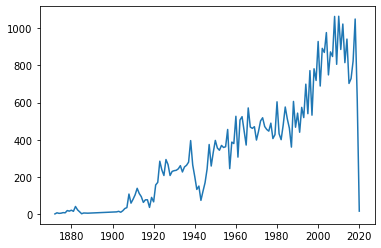

In [11]:
plt.plot(y)

In [12]:
tournaments = data.tournament.unique()
tour_data_map = {}

# store each tournament's total_score yearly into a dictionary
for tournament in tournaments:
    tour_data = data.loc[data['tournament'] == tournament].copy()
    y = tour_data.groupby(['year'])['total_scores'].sum()
    tour_data_map[tournament] = y

In [13]:
len(tour_data_map)

112

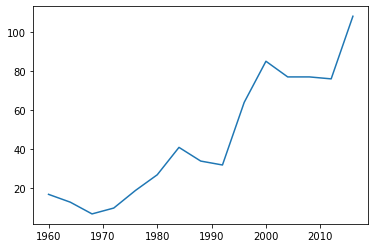

In [14]:
# Euro cup
plt.plot(tour_data_map['UEFA Euro'])

### Define the get_trend funtion

In [15]:
def get_trend(tournament):
    plt.title("Goals Trend of " + tournament)
    plt.plot(tour_data_map[tournament])
    plt.xlabel("Year")
    plt.ylabel("Goals")

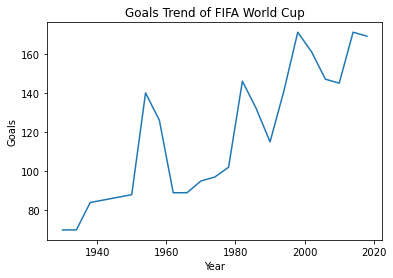

In [16]:
get_trend("FIFA World Cup")

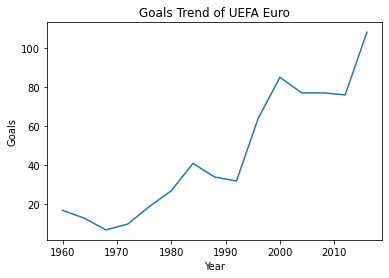

In [17]:
get_trend("UEFA Euro")

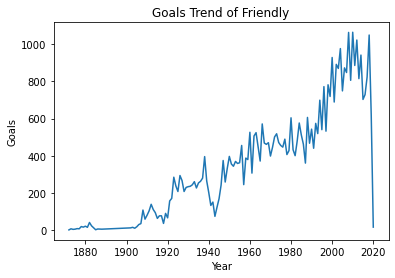

In [18]:
get_trend("Friendly")

### Train a Linear Regression Model

In [19]:
fri_data = tour_data_map['Friendly'].to_frame()

In [20]:
y = fri_data.values

In [21]:
X = [[i] for i in fri_data.index.tolist()]

In [22]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# use linear regression model
regr = linear_model.LinearRegression()
# train 10 times
for _ in range(10):
    # split data into training & test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # train the data
    regr.fit(X_train, y_train)

In [23]:
y_pred = regr.predict(X_test)

In [24]:
fri_data.describe()

,total_scores
count,134.000000
mean,368.373134
std,287.759916
min,0.000000
25%,107.750000
50%,359.000000
75%,522.750000
max,1065.000000


### Evaluation of the model

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[6.12785356]]
Mean squared error: 8084.58
Coefficient of determination: 0.88


In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 69.63984371571422
Mean Squared Error: 8084.577002776376
Root Mean Squared Error: 89.91427585637543


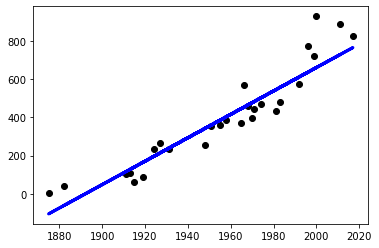

In [27]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

In [28]:
X_test

[[1965],
 [1924],
 [2017],
 [1948],
 [1919],
 [1970],
 [1968],
 [1966],
 [1992],
 [1911],
 [1875],
 [1951],
 [1927],
 [1915],
 [1974],
 [1882],
 [1955],
 [2000],
 [1981],
 [1931],
 [1971],
 [2011],
 [1913],
 [1958],
 [1999],
 [1983],
 [1996]]

In [29]:
y_pred

array([[ 446.43860772],
       [ 195.19661165],
       [ 765.08699299],
       [ 342.26509715],
       [ 164.55734383],
       [ 477.07787554],
       [ 464.82216841],
       [ 452.56646128],
       [ 611.89065392],
       [ 115.53451533],
       [-105.06821293],
       [ 360.64865784],
       [ 213.58017234],
       [ 140.04592958],
       [ 501.58928979],
       [ -62.17323799],
       [ 385.16007209],
       [ 660.91348242],
       [ 544.48426473],
       [ 238.09158659],
       [ 483.2057291 ],
       [ 728.31987161],
       [ 127.79022246],
       [ 403.54363278],
       [ 654.78562886],
       [ 556.73997185],
       [ 636.40206817]])

In [30]:
year = [[2021], [2022], [2023], [2024]]
y_pred = regr.predict(year)

In [31]:
y_pred

array([[789.59840724],
       [795.7262608 ],
       [801.85411436],
       [807.98196793]])

##### In this section of the project, we have created a predictive model to predict the team most likely to win an international tournament. We have selected 10 international teams which are participating in the tourney

In [1]:
import pandas as pd

df = pd.read_csv ('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Feature selection: Analysing what could be the features that help us to determine the team most likely to win. 
1) Historical record of matches between the teams 
2) Goals scored
3) Team performance home and away for the past 50 years

- We are adding these two columns in the database to be able to create a predictive model based on these two features

In [2]:
# Adding winning team and goal difference to the dataset
import numpy as np
match_winner = []
for i in range(len(df['home_team'])):
    if df['home_score'][i] > df['away_score'][i]:
        match_winner.append(df['home_team'][i])
    elif df['home_score'][i] < df['away_score'][i]:
        match_winner.append(df['away_team'][i])
    else:
        match_winner.append('Match Tied')
df['winner'] = match_winner

# Adding goal difference as GD
df['GD'] = np.absolute(df['home_score'] - df['away_score'])

df.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Match Tied,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Match Tied,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3


Working with a subset of the data . Here we atre analysing historical performance of one of the teams participating in the tournament(Spain)

In [3]:
df_1 = df[(df['home_team'] == 'Spain') | (df['away_team'] == 'Spain')]
spain = df_1.iloc[:]
spain.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD
615,1921-12-18,Spain,Portugal,3,1,Friendly,Madrid,Spain,False,Spain,2
629,1922-04-30,France,Spain,0,4,Friendly,Le Bouscat,France,False,Spain,4
682,1922-12-17,Portugal,Spain,1,2,Friendly,Lisbon,Portugal,False,Spain,1
689,1923-01-28,Spain,France,3,0,Friendly,San Sebastián,Spain,False,Spain,3
690,1923-02-04,Belgium,Spain,1,0,Friendly,Antwerp,Belgium,False,Belgium,1


In [4]:
# Adding a new column year to the database
year = []
for row in spain['date']:
    year.append(int(row[:4]))
spain['match_year'] = year

spain.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD,match_year
615,1921-12-18,Spain,Portugal,3,1,Friendly,Madrid,Spain,False,Spain,2,1921
629,1922-04-30,France,Spain,0,4,Friendly,Le Bouscat,France,False,Spain,4,1922
682,1922-12-17,Portugal,Spain,1,2,Friendly,Lisbon,Portugal,False,Spain,1,1922
689,1923-01-28,Spain,France,3,0,Friendly,San Sebastián,Spain,False,Spain,3,1923
690,1923-02-04,Belgium,Spain,1,0,Friendly,Antwerp,Belgium,False,Belgium,1,1923


In [5]:
# Getting the dataset to contain only matches played in the last 5 decades
spain_recent = spain[spain.match_year >= 1970]
spain_recent.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD,match_year
7366,1970-02-11,Spain,Germany,2,0,Friendly,Seville,Spain,False,Spain,2,1970
7376,1970-02-21,Spain,Italy,2,2,Friendly,Madrid,Spain,False,Match Tied,0,1970
7419,1970-04-22,Switzerland,Spain,0,1,Friendly,Lausanne,Switzerland,False,Spain,1,1970
7587,1970-10-28,Spain,Greece,2,1,Friendly,Zaragoza,Spain,False,Spain,1,1970
7614,1970-11-11,Spain,Northern Ireland,3,0,UEFA Euro qualification,Seville,Spain,False,Spain,3,1970


Text(0.5, 1.0, 'Win rate of Spain')

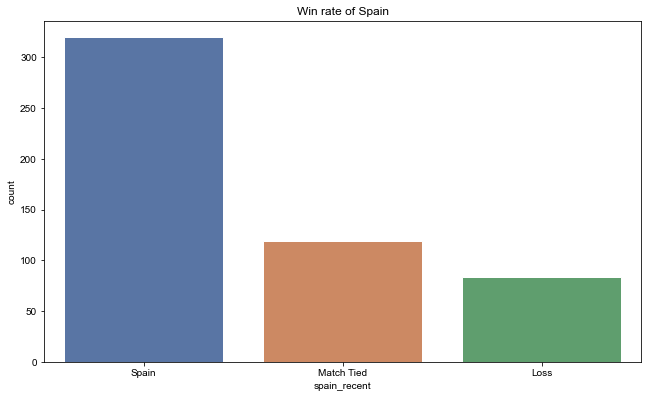

In [6]:
#Analysing the win rate for Spain in the last 50 years

import matplotlib.pyplot as plt
import seaborn as sns
wins = []
for row in spain_recent['winner']:
    if row != 'Spain' and row != 'Match Tied':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'spain_recent'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='spain_recent', data=winsdf)
plt.title("Win rate of Spain") 

In [7]:
# We can conclude from the above graph that Spain has been brilliant in international football over the last 50 years

In [8]:
#Doing the same analysis on a different team (Croatia)
df_2 = df[(df['home_team'] == 'Croatia') | (df['away_team'] == 'Croatia')]
croatia = df_2.iloc[:]
croatia.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD
2281,1940-04-02,Croatia,Switzerland,4,0,Friendly,Zagreb,Croatia,False,Croatia,4
2286,1940-04-21,Switzerland,Croatia,0,1,Friendly,Berne,Switzerland,False,Croatia,1
2288,1940-05-02,Hungary,Croatia,1,0,Friendly,Budapest,Hungary,False,Hungary,1
2317,1940-12-08,Croatia,Hungary,1,1,Friendly,Zagreb,Croatia,False,Match Tied,0
2356,1941-06-15,Germany,Croatia,5,1,Friendly,Vienna,Germany,False,Germany,4


Text(0.5, 1.0, 'Win rate of Croatia')

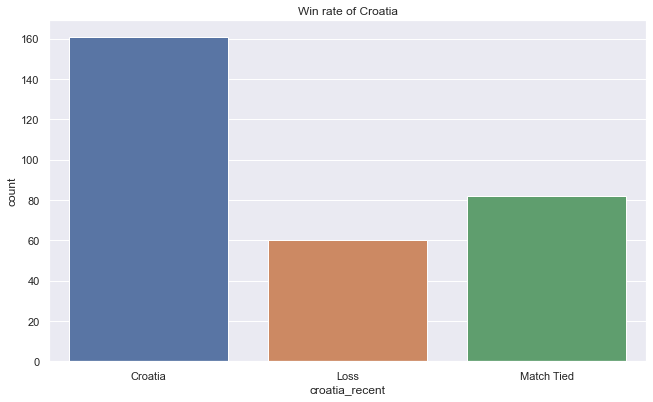

In [9]:
# Adding a new column year to the database
year = []
for row in croatia['date']:
    year.append(int(row[:4]))
croatia['match_year'] = year
croatia_recent = croatia[croatia.match_year >= 1970]
wins = []
for row in croatia_recent['winner']:
    if row != 'Croatia' and row != 'Match Tied':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'croatia_recent'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='croatia_recent', data=winsdf)
plt.title("Win rate of Croatia") 

In [10]:
# Analysing historical matches between 2 specific teams ( Spain vs Croatia)

#Doing the same analysis on a different team (Croatia)
df_vs = df[((df['home_team'] == 'Croatia') & (df['away_team'] == 'Spain'))| ((df['home_team'] == 'Spain') & (df['away_team'] == 'Croatia')) ]
spain_vs_croatia = df_vs.iloc[:]
spain_vs_croatia.head()



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD
18214,1994-03-23,Spain,Croatia,0,2,Friendly,Valencia,Spain,False,Croatia,2
21943,1999-05-05,Spain,Croatia,3,1,Friendly,Seville,Spain,False,Spain,2
22603,2000-02-23,Croatia,Spain,0,0,Friendly,Split,Croatia,False,Match Tied,0
28363,2006-06-07,Spain,Croatia,2,1,Friendly,Geneva,Switzerland,True,Spain,1
34224,2012-06-18,Croatia,Spain,0,1,UEFA Euro,Gdańsk,Poland,True,Spain,1


Text(0.5, 1.0, 'Spain vs Croatia in the last 50 years')

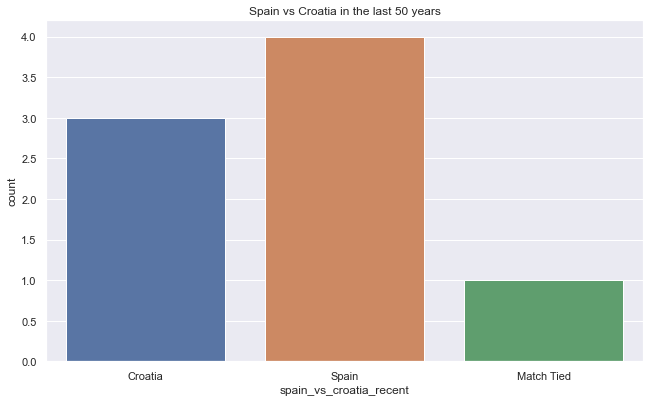

In [11]:
year = []
for row in spain_vs_croatia['date']:
    year.append(int(row[:4]))
spain_vs_croatia['match_year'] = year
spain_vs_croatia_recent = spain_vs_croatia[spain_vs_croatia.match_year >= 1970]
wins = []
for row in spain_vs_croatia_recent['winner']:
    if row != 'Croatia' and row != 'Match Tied':
        wins.append('Spain')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'spain_vs_croatia_recent'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='spain_vs_croatia_recent', data=winsdf)
plt.title("Spain vs Croatia in the last 50 years") 

In [12]:
# We can see that Spain has won more games when they have faced each other in international games over the last 50 years

The important features we have analysed till now would be used to create a predictive model which are :

a) Win rate of a team over the last 50 years
b) Teams when playing head to head with each other
c) Teams playing at Home having an advantage

We are creating a tournament with ten teams. For this analysis we will try to simulate 10 teams for a European cup competition where teams play each other home and away . There are two groups of teams. Group A and Group B. The winners of each group will play a final match to decide the winner of the tournament.

In [13]:
euro_teams = ['Italy', 'Denmark', 'Belgium', 'Netherlands', 'Spain', 'Portugal' , 'Croatia', 'Germany' , 'France','Switzerland']

In [14]:
eurocup_home = df[df['home_team'].isin(euro_teams)]
eurocup_away = df[df['away_team'].isin(euro_teams)]

In [15]:
eurocup = pd.concat((eurocup_home, eurocup_away))
eurocup.drop_duplicates()
# The eurocup sliced dataset now contains historical results for the teams participating in the tournament
eurocup.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD
162,1904-05-01,Belgium,France,3,3,Friendly,Brussels,Belgium,False,Match Tied,0
164,1905-02-12,France,Switzerland,1,0,Friendly,Paris,France,False,France,1
172,1905-04-30,Belgium,Netherlands,1,4,Friendly,Antwerp,Belgium,False,Netherlands,3
173,1905-05-07,Belgium,France,7,0,Friendly,Brussels,Belgium,False,Belgium,7
174,1905-05-14,Netherlands,Belgium,4,0,Friendly,Rotterdam,Netherlands,False,Netherlands,4


Since we have determined the outcome to depend upon the historical performance of a team over the last 50 years and how teams perform against one another, we are goling to slice the dataset to drop the columns not required for the predictive model

In [16]:
year = []
for row in eurocup['date']:
    year.append(int(row[:4]))
eurocup['match_year'] = year
eurocup_recent = eurocup[eurocup.match_year >= 1970]
eurocup_recent = eurocup_recent.drop(['date', 'neutral','home_score', 'away_score', 'tournament', 'city', 'country', 'GD', 'match_year'], axis=1)
eurocup_recent.head()

,home_team,away_team,winner
7366,Spain,Germany,Spain
7376,Spain,Italy,Match Tied
7380,Belgium,England,England
7404,France,Bulgaria,Match Tied
7405,Germany,Romania,Match Tied


Reassign the target values into into three categorical values 0, 1, and 2

The winner column will show :
2: Home team victory
1: Tied Match
0: Away Team victory

In [17]:
eurocup_recent.loc[eurocup_recent.winner == eurocup_recent.home_team,'winner']=2
eurocup_recent.loc[eurocup_recent.winner == 'Match Tied', 'winner']=1
eurocup_recent.loc[eurocup_recent.winner == eurocup_recent.away_team, 'winner']=0
eurocup_recent = eurocup_recent.reset_index(drop=True)
eurocup_recent2 = eurocup_recent
eurocup_recent.head()

,home_team,away_team,winner
0,Spain,Germany,2
1,Spain,Italy,1
2,Belgium,England,0
3,France,Bulgaria,1
4,Germany,Romania,1


In [18]:
# Converting the data to continous input to apply regression on the data to make predictions

euro_cup_predict = pd.get_dummies(eurocup_recent, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

In [19]:
#Split the dataset into training and test sets (70,30)
from sklearn.model_selection import train_test_split

X = euro_cup_predict.drop(['winner'], axis=1)
y = euro_cup_predict["winner"]
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
X_train.head()

,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Belarus,...,away_team_Tahiti,away_team_Tunisia,away_team_Turkey,away_team_Ukraine,away_team_United Arab Emirates,away_team_United States,away_team_Uruguay,away_team_Venezuela,away_team_Wales,away_team_Yugoslavia
2897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we will apply different regression techniques on the database to abe able to generate a predictive model. We have applied logistic regression and also the Decision tree classifier

In [20]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
score = logistic_regression.score(X_train, y_train)
score2 = logistic_regression.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.590
Test set accuracy:  0.574


In [21]:
predictions = logistic_regression.predict(X_test)
print("Training Accuracy: {0:.2f}".format(logistic_regression.score(X_train, y_train)))

Training Accuracy: 0.59


In [22]:
##Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predictions for your data.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [23]:
# Report the tree depth, number of leaves
from sklearn.metrics import accuracy_score
Td = clf.get_depth()
print("Tree depth is:" ,Td)
print("No of leaves is:",clf.get_n_leaves())
games_pred = clf.predict(X_test)
print ("Accuracy for decision tree is ", accuracy_score(y_test,games_pred)*100)
print("Training Accuracy: {0:.2f}".format(clf.score(X_train, y_train)))

Tree depth is: 75
No of leaves is: 793
Accuracy for decision tree is  51.9781718963165
Training Accuracy: 0.71


The decision tree classifier shows better training accuracy so we will use this to predict the games in our tournament.

In [24]:
# Now we will apply the predictions on the tournament
fixtures = pd.read_csv('tournament.csv')

In [25]:
fixtures.head()

,Round Number,Home Team,Away Team,Group,Result
0,1,Italy,Denmark,Group A,NaN
1,1,Denmark,Italy,Group A,NaN
2,1,Italy,Belgium,Group A,NaN
3,1,Belgium,Italy,Group A,NaN
4,1,Italy,Netherlands,Group A,NaN


In [26]:
# List for storing the group stage games
pred_set = []
for index, row in fixtures.iterrows():
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winner': None})
        
pred_set = pd.DataFrame(pred_set)
pred_set2 = pred_set

pred_set.head()

,home_team,away_team,winner
0,Italy,Denmark,None
1,Denmark,Italy,None
2,Italy,Belgium,None
3,Belgium,Italy,None
4,Italy,Netherlands,None


In [27]:
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Make it similar to the trained model dataset
missing_cols = set(euro_cup_predict.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[euro_cup_predict.columns]
pred_set = pred_set.drop(['winner'], axis=1)
pred_set.head()

,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Belarus,...,away_team_Tahiti,away_team_Tunisia,away_team_Turkey,away_team_Ukraine,away_team_United Arab Emirates,away_team_United States,away_team_Uruguay,away_team_Venezuela,away_team_Wales,away_team_Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
games_pred = clf.predict(pred_set)
games_pred

array([2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2])

In [38]:
#SImulating the group matches and creating a points table

points_table = {'key': 'value'}
for i in range(fixtures.shape[0] -1 ):
    print(pred_set2.iloc[i, 1] + " and " + pred_set2.iloc[i, 0])
    if games_pred[i] == 2:
        print("Winner: " + pred_set2.iloc[i, 1])
        if pred_set2.iloc[i, 1] in points_table:
            points_table[pred_set2.iloc[i, 1]] = points_table[pred_set2.iloc[i, 1]]+3
        else:
            points_table[pred_set2.iloc[i, 1]] = 3
    elif games_pred[i] == 1:
        print("Match Tied")
        if pred_set2.iloc[i, 0] in points_table:
            points_table[pred_set2.iloc[i, 0]] = points_table[pred_set2.iloc[i, 0]]+1
        else:
            points_table[pred_set2.iloc[i, 0]] = 1
        if pred_set2.iloc[i, 1] in points_table:
            points_table[pred_set2.iloc[i, 1]] = points_table[pred_set2.iloc[i, 1]]+1
        else:
             points_table[pred_set2.iloc[i, 1]] = 1
    elif games_pred[i] == 0:
        print("Winner: " + pred_set2.iloc[i, 0])
        
        if pred_set2.iloc[i, 0] in points_table:
            points_table[pred_set2.iloc[i, 0]] = points_table[pred_set2.iloc[i, 0]]+3
        else:
            points_table[pred_set2.iloc[i, 0]] = 3
    print ("\n")

Denmark and Italy
Winner: Denmark


Italy and Denmark
Winner: Denmark


Belgium and Italy
Match Tied


Italy and Belgium
Winner: Belgium


Netherlands and Italy
Winner: Netherlands


Italy and Netherlands
Winner: Netherlands


Spain and Italy
Winner: Spain


Italy and Spain
Winner: Italy


Belgium and Denamrk
Winner: Denamrk


Denmark and Belgium
Winner: Denmark


Netherlands and Denamrk
Winner: Denamrk


Denmark and Netherlands
Match Tied


Spain and Denamrk
Winner: Denamrk


Denmark and Spain
Winner: Denmark


Netherlands and Belgium
Match Tied


Belgium and Netherlands
Winner: Belgium


Spain and Belgium
Winner: Belgium


Belgium and Spain
Winner: Belgium


Spain and Netherlands
Winner: Spain


Netherlands and Spain
Winner: Spain


Croatia and Portugal
Winner: Croatia


Germany and Portugal
Winner: Portugal


France and Portugal
Winner: Portugal


Switzerland and Portugal
Winner: Switzerland


Spain and Croatia
Winner: Spain


Germany and Croatia
Winner: Croatia


France and Croatia

In [53]:
# Here is how the points table look like after the tournament:

i=1;
print("Points Table :\n**************\n")
for key, value in points_table.items():
    print(key, ' : ', value)
    print("\n")

Points Table :
**************

key  :  value


Denmark  :  13


Italy  :  4


Belgium  :  14


Netherlands  :  8


Spain  :  12


Denamrk  :  9


Croatia  :  13


Portugal  :  12


Switzerland  :  10


France  :  6


Germany  :  3




In [54]:
#We can conclude that Croatia and Belgium topped the respective groups based on the group matches results

In [87]:
#Predicting the final match and assuming that Croatia is the home team for the final match.
final_pred = []
final_pred.append({'home_team': 'Croatia', 'away_team': 'Belgium', 'winner': None})
final_pred = pd.DataFrame(final_pred)
final_pred.head()

,home_team,away_team,winner
0,Croatia,Belgium,None


In [88]:
final_pred1 = final_pred
final_pred = pd.get_dummies(final_pred, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Make it similar to the trained model dataset
missing_cols = set(euro_cup_predict.columns) - set(final_pred.columns)
for c in missing_cols:
    final_pred[c] = 0
final_pred = final_pred[euro_cup_predict.columns]
final_pred = final_pred.drop(['winner'], axis=1)

games_pred = clf.predict(final_pred)

In [89]:
print(final_pred1.iloc[0, 1] + " and " + final_pred1.iloc[0, 0])
if games_pred[0] == 2:
        print("Winner: " + final_pred1.iloc[0, 1])
else:
        print("Winner: " + final_pred1.iloc[0, 0])

Belgium and Croatia
Winner: Belgium


In [90]:
# Our prediction model determined Belgium to be the winner of the tournament based on the performance since the last 5 decades